# Temperature Response

This example introduces the temperature response for a X-Ray Telescope (XRT) X-Ray channel, assuming a spectral emission model at a given date. Begin by importing packages. 

In [1]:
import xrtpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Contents

1. [Define Filter](#Define-a-filter)
2. [Define Date & Time](#Define-a-date-and-time) 
3. [Temperature-Response-Fundamental](#TemperatureResponseFundamental)
4. [Temperature Response Function](#Temperature-Response-function)
5. [Plot Temperature Response](#Plotting-the-Temperature-Response)


## Define a filter

Define a filter channel by its common abbreviation. In this example, we will be exploring the carbon-on-polyimide filter. Reference `X-Ray Filter Channel` for filter channel information.

In [17]:
filter = "C-poly"

## Define a date and time

[sunpy-time]: https://docs.sunpy.org/en/stable/guide/time.html

The date and time can be defined together. Examples of date and time strings formats can be found at [sunpy-time]. We are going to explore data a year after the spacecraft launch date.

In [19]:
date_time = "2007-09-22T21:59:59"

## TemperatureResponseFundamental

The `TemperatureResponseFundamental` object is where we find all functions and properties used to calculate the temperature response. The `TemperatureResponseFundamental` object is referenced by inserting the defined `Filter` and `date_time`. 

In [20]:
Temperature_Response_Fundamental = xrtpy.response.TemperatureResponseFundamental(
    filter, date_time
)

## Temperature Response function

The temperature response function is exercised by referencing the `temperature_response()` function in `Temperature_Response_Fundamental`. 

In [21]:
temperature_response = Temperature_Response_Fundamental.temperature_response()

[astropy-quantity]: https://docs.astropy.org/en/stable/api/astropy.units.quantity.Quantity.html

[astropy.units]: https://docs.astropy.org/en/stable/units/index.html


The `temperature_response` function returns the temperature response for a selected filter, date, and time as an [astropy-quantity] with [astropy.units].  
  

In [22]:
print("Temperature Response:\n", temperature_response)

Temperature Response:
 [1.79569437e-32 3.04182373e-32 5.61876663e-32 1.13806290e-31
 2.44515344e-31 5.38489615e-31 1.19238702e-30 2.61709483e-30
 5.63608478e-30 1.18178895e-29 2.35994241e-29 4.48704759e-29
 8.32045740e-29 1.51925396e-28 2.72073646e-28 4.76487247e-28
 8.17972369e-28 1.38813227e-27 2.33164752e-27 3.80486338e-27
 5.83875146e-27 8.25181456e-27 1.08263571e-26 1.33935486e-26
 1.57425187e-26 1.79453371e-26 2.11745883e-26 2.72805619e-26
 3.70011521e-26 5.00680877e-26 6.63939475e-26 8.60739181e-26
 1.08988976e-25 1.34591324e-25 1.61926727e-25 1.89777411e-25
 2.16499596e-25 2.39796850e-25 2.56639818e-25 2.63672949e-25
 2.57682983e-25 2.36792954e-25 2.02419530e-25 1.62531459e-25
 1.27087698e-25 1.00433863e-25 8.17452293e-26 6.87744505e-26
 5.96450674e-26 5.30066854e-26 4.79788053e-26 4.40083154e-26
 4.07399371e-26 3.79641313e-26 3.55357936e-26 3.33891026e-26
 3.14775372e-26 2.97840015e-26 2.82996514e-26 2.70134584e-26
 2.59052091e-26] cm5 DN / (pix s)


## Plotting the Temperature-Response

[chiantidatrbase.org]: https://www.chiantidatabase.org/

We are going to plot the `temperature_response` function versus the temperatures . The XRT chianti version is based on abundance assumptions. More information about the chianti database can be found at [chiantidatrbase.org].

The CHIANTI temperatures exist in the `Temperature_Response_Fundamental` object in units of Kelvin (K). These temperatures are independent of the channel filter.

In [23]:
CHIANTI_temperature = Temperature_Response_Fundamental.CHIANTI_temperature

[numpy.log10]: https://numpy.org/doc/stable/reference/generated/numpy.log10.html

The `CHIANTI_temperature` values are logged for scaling.

In [24]:
log_CHIANTI_temperature = np.log10(CHIANTI_temperature.value)

In addition, we are going to plot the temperature response near the spacecraft launch date to analyze any difference in the data.  We define the temperature response data for the launch date in the same manner as previously shown. 

In [26]:
launch_date_time = "2006-09-22T21:59:59"

In [27]:
TRF = xrtpy.response.TemperatureResponseFundamental(filter, launch_date_time)
launch_date_temperature_response = TRF.temperature_response()

Create a plotting function that plots the `temperature_response` and launch_date_temperature_response versus `log_CHIANTI_temperature` for the chosen filter, date, and time. 

In [28]:
def plotting_temperature_response():

    plt.figure(figsize=(30, 12))

    plt.plot(
        log_CHIANTI_temperature,
        np.log10(temperature_response.value),
        linewidth=8,
        label="{:} {:}".format(filter, date_time),
    )
    plt.plot(
        log_CHIANTI_temperature,
        np.log10(launch_date_temperature_response.value),
        label="{:} {:}".format(filter, launch_date_time),
        color="red",
    )

    plt.title("XRT Temperature Response", fontsize=30)
    plt.xlabel("Temperature ($K$)", fontsize=27)
    plt.ylabel("$DN$ $cm^5$ $ s^-1$ $pix^-1$", fontsize=27)
    plt.legend(fontsize=30)

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    plt.grid()
    plt.show()

Run `plotting_temperature_response` function to create the plot.

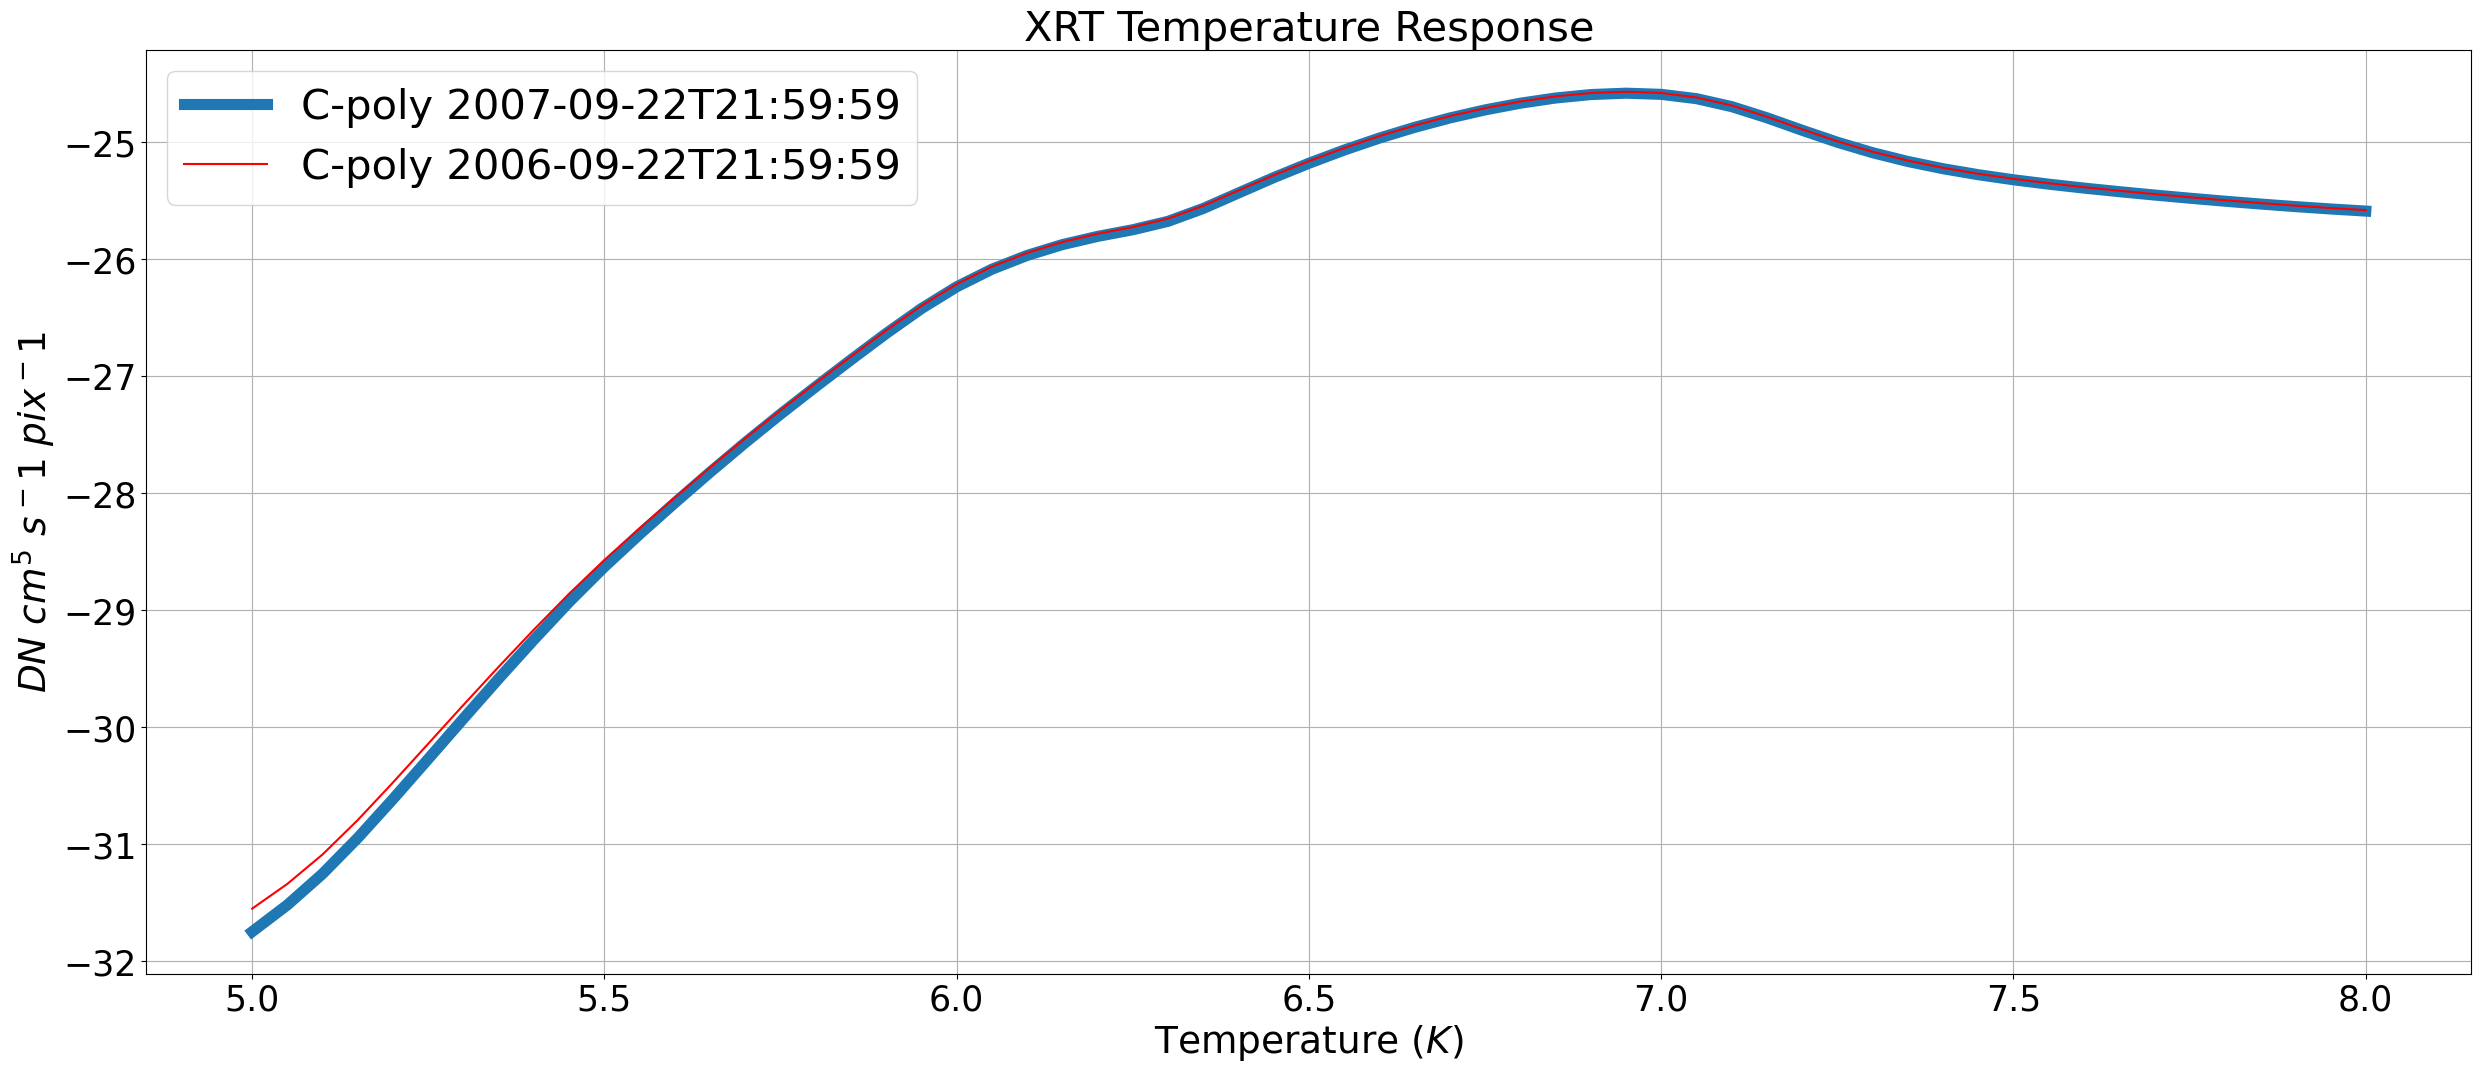

In [29]:
plotting_temperature_response()

[Montana State University Solar Physics site]: http://solar.physics.montana.edu/HINODE/XRT/xrt_contam_db.html
[Narukage et. al. (2011)]: https://doi.org/10.1007/s11207-010-9685-2 

Plotting the temperature response at launch date and a year after highlights the differences. This is due to the contamination layer thickness on the CCD. Information about the XRT CCD contaminant layer thickness calculation can be found at [Montana State University Solar Physics site]. In addition, more information can be found referencing [Narukage et. al. (2011)].